# Abalone Age Prediction

<h3><b>Problem Statement</b></h3>
The aim of this project is to predicting the age of abalone by analyzing its physical measurements. The age of abalone is equal to 1.5 multiplied by the number of its rings.

<h3><b>Background</b></h3>
An abalone is type of cold-water marine snail. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings. Other measurements, which are easier to obtain, are used to predict the age.  

<h3><b>Overview</b></h3>
<b>Data Source</b>: UCI Machine Learning Repository<br>
<b>Dataset Info</b>: The dataset has 4177 observations and 9 features.It does not have any missing values.<br>
<b>Target Variable</b>: Rings or, newly created column derived from Rings called Age.

<h3><b>Data Description:

| Name | Data Type | Description | Measurement| Variable Type |
| :--- | :--- | :-------- | :--- | :--- |
| Sex | Categorical | Male, Female and Infant | M, F, I | Independent Variable |
| Length | Numerical | Longest shell measurement | mm | Independent Variable |
| Diameter | Numerical | perpendicular to length | mm | Independent Variable |
| Height | Numerical | with meat in shell | mm | Independent Variable |
| Whole weight | Numerical | whole abalone | grams | Independent Variable |
| Shucked weight | Numerical | weight of meat | grams | Independent Variable |
| Viscera weight | Numerical | gut weight (after bleeding) | grams | Independent Variable |
| Shell weight | Numerical | after being dried | grams |Independent Variable |
| Rings | Numerical | +1.5 gives the age in years | years |Dependent/Target Variable |

<h3><b>Problem Approach</b></h3>
The age of abalones can be predicted using Supervised Machine Learning Algorithms. Following the various steps of the data and machine learning pipeline, a candidate algorithm will be selected. The following steps will be conducted:

- Data Preprocessing and cleaning
- Exploratory Data Analysis
- Data Visualization
- Feature Engineering
- Candidate Model Research
- Candidate Model Evaluation
- Visualization and Inspection of Results.

<h3><b>Classification + Regression Approach</b></h3><span><b>This solution can be treated with both regression and classification. We analyze both approaches, and it is to be noted that I strongly prefer a classification approach over a regression approach.</b></span>

## Solution
### Importing Libraries

In [1]:
%%html
<style>
table {float:left}
</style>

In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import pandas_profiling as pp
from IPython.display import IFrame
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score
from tabulate import tabulate
%matplotlib inline

### Loading the Dataset

In [3]:
#Defining column list for the dataset
columns_list=['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Rings']
#Loading the data as a Pandas dataframe
abalone_data = pd.read_csv('abalone_data.csv', names = columns_list)

### Viewing the Dataset

In [4]:
#Viewing the first five rows of the dataset
abalone_data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Exploratory Data Analysis


In [5]:
#Fetching the shape of the dataset
print('This dataset has {} observations with {} features.'.format(abalone_data.shape[0], abalone_data.shape[1]))
#Fetching information about the columns
print('\nThis dataset has {} columns with the data types :'.format(len(abalone_data.columns)))
print(abalone_data.dtypes)
#Getting the count of unique values in the columns
print('\nThe unique value counts for each of the columns are:\n')
print(abalone_data.nunique())

This dataset has 4177 observations with 9 features.

This dataset has 9 columns with the data types :
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

The unique value counts for each of the columns are:

Sex                  3
Length             134
Diameter           111
Height              51
Whole Weight      2429
Shucked Weight    1515
Viscera Weight     880
Shell Weight       926
Rings               28
dtype: int64


<h3><b>Statistical Insights</b></h3><span style="color:darkblue">The key statistical insights indicate that all the non-categorical features have a minimum value greater than 0.<br> On comparison of the mean, standard deviation and 50th percentile, it can be suggested that 'Height', 'Shell Weight' and 'Rings' have somewhat normal or symmetric distribution. <br>Other features seem to be skewed slightly, which can be confirmed from data visualizations, included below.

In [6]:
#Getting basic statistical details of the dataset
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole Weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked Weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera Weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell Weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


<h3><b>Dataset Summary</b></h3><span style="color:darkblue">The dataset has 1 categorical, 7 float type and 1 integer type columns with 4177 observations each.

In [7]:
#Getting a summary of the dataset
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<h3><b>Missing/Null Values</b></h3><span style="color:darkblue">The dataset does not have any missing or null values</span>

In [8]:
#Analyzing the number of missing values
abalone_data.isna().mean().to_frame(name='% of missing values').T

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
% of missing values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Analyzing data for any null values
print('The dataset has {} null values'.format(abalone_data.isnull().any().sum()))

The dataset has 0 null values


<h3><b>Duplicate Values</b></h3><span style="color:darkblue">Duplicate Values will not be considered due to the nature of the dataset.</span>

<h3><b>Value Counts</b></h3><span style="color:darkblue">The column 'Sex' has a class imbalance.</span>

In [10]:
#Value counts for categorical column
print('The gender distribution for the sex column is:\n')
print(abalone_data['Sex'].value_counts().to_frame().T)

The gender distribution for the sex column is:

        M     I     F
Sex  1528  1342  1307


### Pandas Profile Report

In [185]:
# Profile Report
abalone_profile_report = pp.ProfileReport(abalone_data)
abalone_profile_report.to_file('abalone_profile_report.html')
display(IFrame('abalone_profile_report.html', width=900, height=500))

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate Analysis

<h3><b>Categorical Variables</b></h3><span style="color:darkblue">The column 'Sex' has a class imbalance, as depicted in the visualization below. This can be treated with methods such as SMOTE.</span>

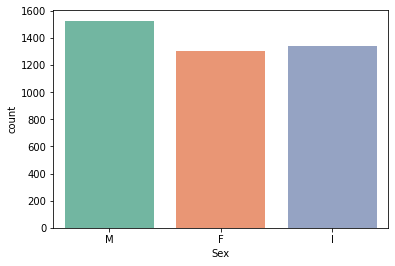

In [11]:
#Visualizing the class distribution of categorical column 'Sex'
sns.countplot(x = 'Sex', data = abalone_data, palette="Set2")

<h3><b>Non Categorical Features</b></h3><span style="color:darkblue">The distribution of these features can be analyzed with the histograms below:<br>Length and Diameter are skewed to the left.<br> Height has a normal distribution<br>Whole Weight, Shucked Weight, Viscera Weight and Shell Weight all are postively skewed to the right.<br>Rings has a normal distribution and does not indicate any major skewness</span>


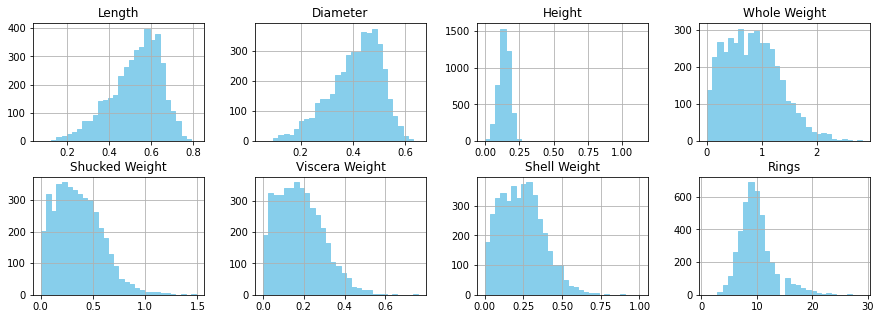

In [12]:
# visualizing the  distribution the  numerical features
abalone_data.hist(bins=30, figsize=(15, 5),layout=(2, 4), color = "skyblue", ec="skyblue")
plt.show()

### Boxplots

<h3><b>Size-Related Features: Length, Height, Diameter</b></h3><span style="color:darkblue">The Length and Diameter features are indicative of skewness, which confirms the above analysis. There is a possibility of outliers.<br>The Height feature shows a strong possibility of at least 2 outliers</span>

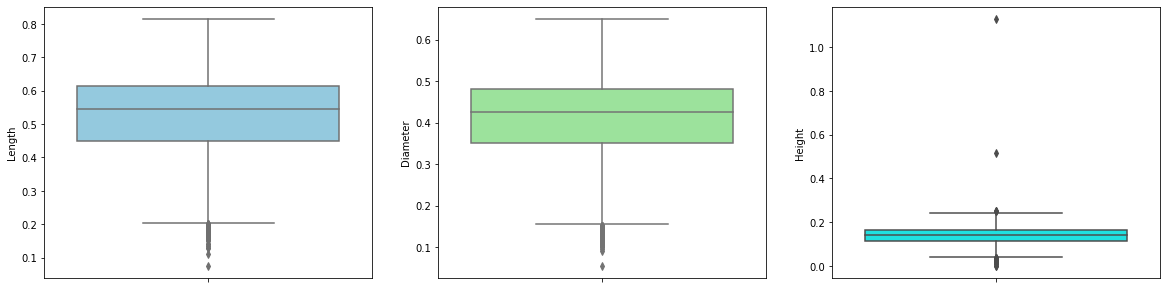

In [13]:
sns.color_palette("pastel")
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows= 1, ncols = 3, figsize = (20,5))
sns.boxplot(ax = ax1, y = 'Length', data = abalone_data, color = 'skyblue')
sns.boxplot(ax = ax2, y = 'Diameter', data = abalone_data, color = 'lightgreen')
sns.boxplot(ax = ax3, y = 'Height', data = abalone_data, color = 'cyan')

<h3><b>Weight-Related Features: Whole Weight, Shucked Weight, Viscera Weight, Shell Weight</b></h3>
<span style="color:darkblue">Along with skewness, there is a presence of outliers for all of these features. One of the main reasons could be that they are highly related to each other, based on the data description.</span>

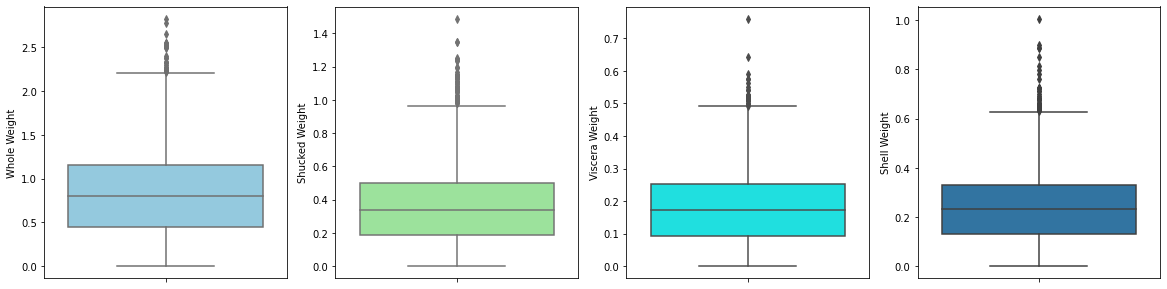

In [14]:
sns.color_palette("pastel")
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows= 1, ncols = 4, figsize = (20,5))
sns.boxplot(ax = ax1, y = 'Whole Weight', data = abalone_data, color = 'skyblue')
sns.boxplot(ax = ax2, y = 'Shucked Weight', data = abalone_data, color = 'lightgreen')
sns.boxplot(ax = ax3, y = 'Viscera Weight', data = abalone_data, color = 'cyan')
sns.boxplot(ax = ax4, y = 'Shell Weight', data = abalone_data)

<h3><b>Target Feature: Rings</b></h3><span style="color:darkblue">The distribution indicated for the Ring feature is that most of the values lie between 10 to 29. There could be a presence of outliers but they need to be confirmed with further analysis.</span>

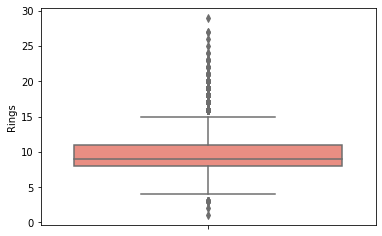

<Figure size 720x720 with 0 Axes>

In [15]:
sns.boxplot(y="Rings", data = abalone_data, color = "salmon")
plt.figure(figsize = (10,10))
plt.show()

<h2><b>Multivariate Analysis</b></h2><span style="color:darkblue">The relationship of features is observed with respect to each other to understand the distribution and uncover insights.<br> Visualizations such as violinplot, pairplot and heatmaps are depicted below to show presence of outliers and feature correlation.

<h3><b>Categorical Feature 'Sex' w.r.t. Target Feature 'Rings'</b></h3><span style="color:darkblue">The below violinplot indicates the relationship between the type of 'Sex' and the number of 'Rings'.<br>Male Abalones have values ranging from 2 to 27.<br>Females have higher minimum values than Males, starting at 5 and ranging up to 29.<br>Infants have a comparatively smaller distribution, with values ranging from 1 to 22.

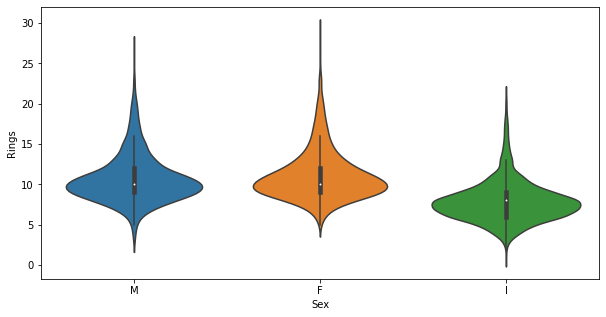

In [16]:
#Drawing ViolinPlot to analyze 'Sex' and 'Rings'
plt.figure(figsize=(10, 5))
sns.violinplot(data=abalone_data, x='Sex', y='Rings', grid = True)
plt.show()

<h3><b>Non-Categorical Features  w.r.t. Target Feature 'Rings'</b>

<h3><b>Size-Related Features w.r.t Target Feature</b></h3><span style="color:darkblue">The below pairplot illustrates the relationship between size-related features 'Length', 'Diameter', 'Height' with respect to the Target vairbale 'Rings.<br>Length can be seen to have some outliers, as well as Height, both for 'Sex' type Female.<br>Height has two obvious outliers at 0.50mm observation for Male type abalone and above 1mm observation for Female type abalone.

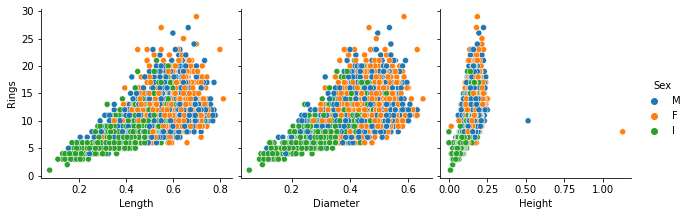

In [17]:
sns.pairplot(abalone_data,x_vars=["Length", "Diameter","Height"], y_vars=["Rings"], height =3, hue="Sex")

<h3><b>Weight-Related Features w.r.t Target Feature</b>
</h3><span style="color:darkblue">It can observed from the below pairplot that all the Weight-related features have similar distribution of Rings throughout each type of Category.<br>Some outliers can be observed for each of the Weight Features, belonging to the Male and Female abalone types.


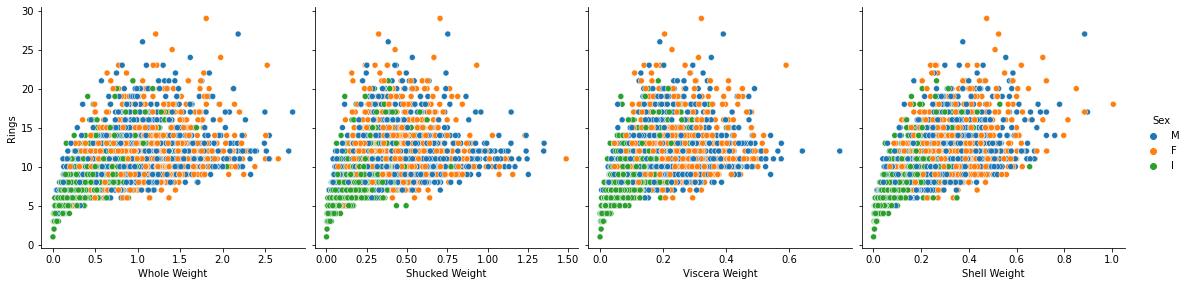

In [18]:
sns.pairplot(abalone_data,
             x_vars=["Whole Weight", "Shucked Weight", "Viscera Weight","Shell Weight"],
             y_vars=["Rings"], height =4, hue="Sex")

<h3><b>Feature Correlation</b></h3><span style="color:darkblue">All independent features are highly correlated to each other, which means some of them can be dropped to tune models.<br>
Diameter is highly correlated with all features except Rings. It has a correlation of 0.99 with Length.<br>
Most of the pearson coefficients > 0.95 for the weight related features, indicating that they are highly correlated to each other. This is largely true based on their data description.<br>
Height is slightly less correlated with all other features.</span>


In [19]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(abalone_data,0.8)
print('Correlated columns @ 0.8:\n', col)

Correlated columns @ 0.8:
 [('Diameter', 'Length'), ('Height', 'Length'), ('Height', 'Diameter'), ('Whole Weight', 'Length'), ('Whole Weight', 'Diameter'), ('Whole Weight', 'Height'), ('Shucked Weight', 'Length'), ('Shucked Weight', 'Diameter'), ('Shucked Weight', 'Whole Weight'), ('Viscera Weight', 'Length'), ('Viscera Weight', 'Diameter'), ('Viscera Weight', 'Whole Weight'), ('Viscera Weight', 'Shucked Weight'), ('Shell Weight', 'Length'), ('Shell Weight', 'Diameter'), ('Shell Weight', 'Height'), ('Shell Weight', 'Whole Weight'), ('Shell Weight', 'Shucked Weight'), ('Shell Weight', 'Viscera Weight')]


### Correlation Matrix

In [20]:
#Correlation Matrix
corr = abalone_data.corr()
corr

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### Heatmap to Analyze Feature Correlation

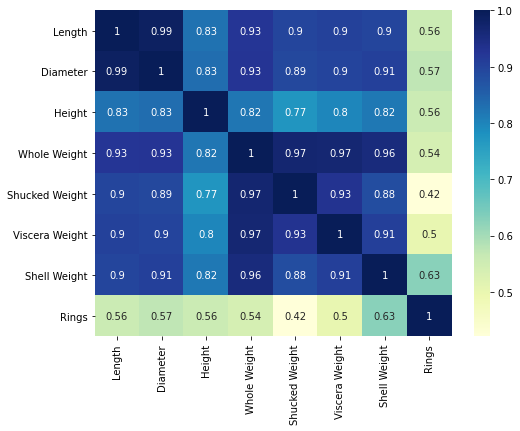

In [21]:
#Setting figure size
plt.figure(figsize = (8,6))
#Visualizing the correlation matrix through heatmap
sns.heatmap(corr, cmap="YlGnBu", annot = True)

<h3><b>Outlier Detection and Treatment: Tukey Method</b></h3><span style="color:darkblue">The Tukey Method is used to detect outliers and treat them by considering data points which are far from the median<br>The method uses the interquartile range, the first quartile(25%) and the last quartile(75%) in a formula to identify which data points lie outside of the acceptable range.<br>The Tukey method is based on a simple rule that data points are outliers if they are 1.5 times the interquartile range of the data<br></span>

In [22]:
#Creating new variable before data is preprocessed
df = abalone_data

In [23]:
#Tukey Method Function to Detect Outliers
from collections import Counter
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        
        #IQR calculation
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q3 + (outlier_step)
        
        #Outlier detection                                    #Outlier indexes
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        #Store indexes
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    # number of outliers
    # If we have more then 2 outliers in a sample, this sample ll be drop
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2 )
    #we are taking indexes
    
    return multiple_outliers

In [24]:
# List of Outliers
outliers=detection(df,["Length", "Diameter","Height", "Whole Weight", "Shucked Weight", "Viscera Weight","Shell Weight"])     
print("The dataset has {} outliers.".format(df.loc[outliers].shape[0]))

The dataset has 38 outliers.


In [25]:
#Dropping the outliers
df=df.drop(outliers,axis=0).reset_index(drop = True)
#Getting Shape of dataset
print("The dataset has {} observations are removing outliers.".format(df.shape[0]))

The dataset has 4139 observations are removing outliers.


<h2><b>Feature Engineering</b></h2><span style="color:darkblue">The categorical column 'Sex' will be dropped because it does not contribute to the prediction of the target variable "Rings".

In [26]:
#Dropping categorical column 'Sex'
df = df.drop('Sex', axis = 1)
df.shape

(4139, 8)

<h3><b>Feature Selection</b></h3><span style="color:darkblue">Since there is a high correlation between features, feature selection needs to be performed before training the models.

<h3><b>Feature Selection using SelectFromModel</b></h3><span style="color:darkblue">Feature selection is performed here by using sklearn's selectfrom model. It trains the data on a logistic regression model to highlight which features are important to prediction of the target variable.</span>

In [27]:
df2 = df

#Create x and y variables to perform feature selection
x1 = df2.drop('Rings', axis=1).to_numpy()
y1= df2['Rings'].to_numpy()


#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2 ,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train1)
x_test2 = sc.transform(x_test1)


#Next Steps - Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=100,max_iter=1000)
clf.fit(x_train2,y_train1)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = df2.drop('Rings',axis=1).columns[feature_idx]
print('\nKey Features :',feature_name)


Key Features : Index(['Whole Weight', 'Shucked Weight', 'Shell Weight'], dtype='object')


<h3><b>Feature Selection using Recursive Feature Elimination (RFE)</b></h3><span style="color:darkblue">Feature selection is performed by selecting features by recursively considering smaller and smaller sets of features.</span>

In [28]:
X = df.drop('Rings', axis=1)
y = df['Rings']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

lr = LinearRegression()
n = [{'n_features_to_select':list(range(1,10))}]
rfe = RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

print(gsearch.best_params_)

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank']).T

{'n_features_to_select': 7}


,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
Rank,1,1,1,1,1,1,1


<span style="color: darkblue"><b>Insights:</b><br>Both techniques provide conflicting results as to which features are important.<br> SelectFromModel eliminates importance of all features except 'Whole Weight', 'Shucked Weight', 'Shell Weight'. <br> RFE suggests that all features are equally important.<br><b></span>

## Developing Models

<h3><b>Splitting into Training and Validation Data</b></h3>

In [32]:
#Create x and y variables
x = df.drop('Rings', axis=1).to_numpy()
y = df['Rings'].to_numpy()

<h3><b>Creating Training and Testing Dataset</b></h3>

In [33]:
#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<h3><b>Standardization</b></h3>

In [36]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x = sc.transform(x)

# Models and Evaluation

<h2><b>1. Regression Approach</b></h2>

<h3><b>Model Research</b></h3><span style="color:darkblue">The first approach is treating the problem as a regression problem. We use the following regression models and train them on the dataset.<br>1. Linear Regression<br>2. Ridge Regression<br>3. Random Forest Regression<br>4. Gradient Boost Regression</span>

<h3><b>Constructing Model Pipelines</b></h3>

In [37]:
#constructing model pipeline
pipeline =[]
alpha=0.5
#Initializing Linear Regression Hyperparameters
pipe_lm = Pipeline([('scl', StandardScaler()), ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)
#Initializing Ridge Regression Hyperparameters
pipe_ridge= Pipeline([('scl', StandardScaler()), ('clf', Ridge(alpha=alpha,tol=1,random_state=42))])
pipeline.insert(2,pipe_ridge)
#Initializing RandomForest Regression Hyperparameters
pipe_rf= Pipeline([('scl', StandardScaler()),('clf', RandomForestRegressor(max_depth=2,n_estimators=100,random_state=42))])
pipeline.insert(4,pipe_rf)
#Initializing GradientBoosting Regression Hyperparameters
pipe_gradb= Pipeline([('scl', StandardScaler()), ('clf', GradientBoostingRegressor(alpha=alpha,tol=1,random_state=42))])
pipeline.insert(5,pipe_gradb)

In [38]:
#Model Analysis
models=[]
models.append(('LinearRegression',pipe_lm))
models.append(('Ridge',pipe_ridge))
models.append(('RandomForestRegressor',pipe_rf))
models.append(('GradientBoostRegressor',pipe_gradb))

In [40]:
#Model Evaluation
results =[]
names=[]
scoring ='neg_root_mean_squared_error'
print('Model Evaluation')
for name, model in models:
    #Using K Fold Split
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
    #Cross Validation Score 
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    #Printing the RMSE score
    print('\n{} \n RMSE Score:{: .2f}'.format(name,np.sqrt(-cv_results.mean())))
    print()
print('\n')

Model Evaluation

LinearRegression 
 RMSE Score: 1.50


Ridge 
 RMSE Score: 1.50


RandomForestRegressor 
 RMSE Score: 1.59


GradientBoostRegressor 
 RMSE Score: 1.48





<h3><b>Model Result Evaluation</b></h3><span style="color:darkblue">All models perform similarly and poorly, with RandomForest performing the worst and GradientBoost performing the best</span>

<h3><b>Model Result Visualization</b></h3><span style="color:darkblue">The results obtained from the regression models can be visualized below through a boxplot. The boxplot compares the Root Mean Squared Error(RMSE) evaluation metric for the models.</span>

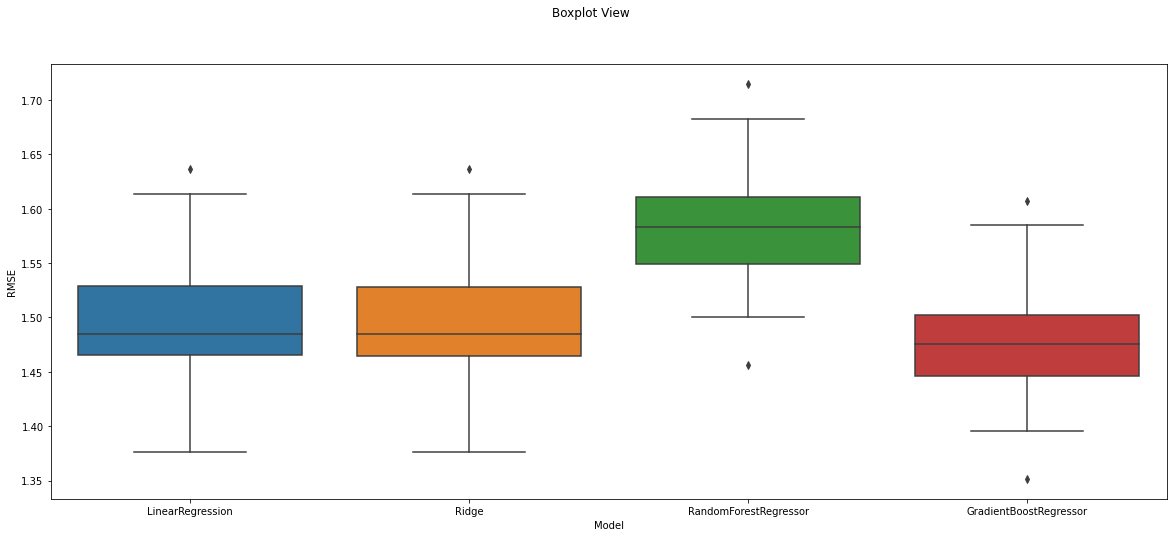

In [41]:
#Boxplot View
fig = plt.figure(figsize=(20,8))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

<h3><b>Model Results and Recommendations</b></h3><span style="color:darkblue">We trained and evaluated the regression models on the data and th results were subpar. The model performance was calculated using evaluation metrics such as RMSE score. However, we noticed that a high correlation between features, as indicated during EDA, which could be a factor for the poor scores.<br><b> For this reason, it is strongly recommended to perform principal component analysis to reduce the dimensions and train the model accordingly</b> </span>

### Dimentionality Reduction using Principal Component Analysis (PCA)


In [42]:
#Principal Component Analysis
#Get the target variable
target = df['Rings']

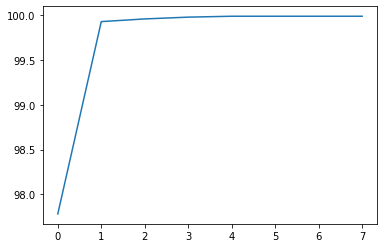

In [43]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = df.values

# Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=8)
pca.fit(X)

# Proportion of variance explained
variance_explained = pca.explained_variance_ratio_

# Cumulative scree plot
var1 = np.cumsum(np.round(variance_explained, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [44]:
#Selecting 3 components since it explains almost 98+ % data variance
pca = PCA(n_components=3)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,target, test_size=0.2, random_state = 42)

<h2><b>Regression Models after PCA</b></h2><span style="color:darkblue">We train the models on the data which has been treated with pca and then analyze the performance</span>

### Linear Regression with PCA

      predicted  actual
3765       12.0      12
1278        9.0       9
568        10.0      10
149         4.0       4
1268        9.0       9

rmse :  2.4115280113654724e-15
R2 score :  1.0

Model Visualization between Actual and Predicted Values


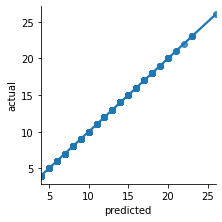

In [94]:
#Defining the model
lr_model = LinearRegression().fit(X_train_pca,y_train_pca)
#Predict for test cases
lr_predictions = lr_model.predict(X_test_pca)
#Create data frame for actual and predicted values
lr_eval = pd.DataFrame({'predicted':lr_predictions, 'actual': y_test_pca})
print(lr_eval.head())
print()
# Model Evaluation 
mse = np.mean((y_test_pca-lr_predictions)**2)
rmse_lr = np.sqrt(mse)
r2_score_lr = r2_score(y_test_pca, lr_predictions)
print('rmse : ',rmse_lr)
print('R2 score : ',r2_score_lr)
#Model Visualization
print('\nModel Visualization between Actual and Predicted Values')
eval_df = pd.DataFrame({'predicted':lr_predictions, 'actual': y_test_pca})
ax = sns.lmplot(x="predicted", y="actual", data=eval_df,height =3)

### Random Forest with PCA

      predicted  actual
3765  12.000000      12
1278   9.000000       9
568   10.000000      10
149    4.599322       4
1268   9.000000       9

RMSE :  0.12768997699005058
R2 score :  0.9985435587712371

Model Visualization between Actual and Predicted Values


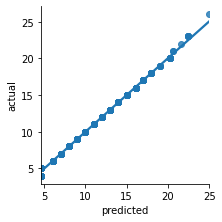

In [97]:
#Defining the model
rf_model = RandomForestRegressor(random_state = 42, max_depth = 4, n_estimators = 100).fit(X_train_pca,y_train_pca)
#Predict for test cases
rf_predictions = rf_model.predict(X_test_pca)
#Create data frame for actual and predicted values
rf_eval = pd.DataFrame({'predicted':rf_predictions, 'actual': y_test_pca})
print(rf_eval.head())
print()
# Model Evaluation 
mse = np.mean((y_test_pca-rf_predictions)**2)
rmse_rf = np.sqrt(mse)
r2_score_rf = r2_score(y_test_pca, rf_predictions)
print('RMSE : ',rmse_rf)
print('R2 score : ',r2_score_rf)
print('\nModel Visualization between Actual and Predicted Values')
eval_df = pd.DataFrame({'predicted':rf_predictions, 'actual': y_test_pca})
ax = sns.lmplot(x="predicted", y="actual", data=eval_df,height =3)

### Gradient Boosting Regressor with PCA

      predicted  actual
3765       12.0      12
1278        9.0       9
568        10.0      10
149         4.0       4
1268        9.0       9

RMSE :  0.013796309805567874
R2 score :  0.9999829977959759

Model Visualization between Actual and Predicted Values


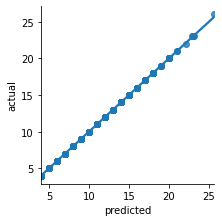

In [98]:
#Defining the model
gbr_model = RandomForestRegressor(random_state = 42).fit(X_train_pca,y_train_pca)
#Predict for test cases
gbr_predictions = gbr_model.predict(X_test_pca)
#Create data frame for actual and predicted values
gbr_eval = pd.DataFrame({'predicted':gbr_predictions, 'actual': y_test_pca})
print(gbr_eval.head())
print()
# Model Evaluation 
mse = np.mean((y_test_pca-gbr_predictions)**2)
rmse_gbr= np.sqrt(mse)
r2_score_gbr = r2_score(y_test_pca, gbr_predictions)
print('RMSE : ',rmse_gbr)
print('R2 score : ',r2_score_gbr)
#Model Visualization
print('\nModel Visualization between Actual and Predicted Values')
eval_df = pd.DataFrame({'predicted':gbr_predictions, 'actual': y_test_pca})
ax = sns.lmplot(x="predicted", y="actual", data=eval_df,height =3)

<h3><b>Model Results Analysis of Regression Models after PCA</b></h3><span style="color:darkblue">It is evident from the results that the model performance has drastically improved after being trained on data which has undergone PCA. Of these models, Linear Regressor performs the best with a 100% accuracy. This could indicate overfitting.</span>

<h2><b>2. Classification Approach<b></h2><span style='color:darkblue'></span>

In [113]:
pipeline =[]
#Logistic Regression Model and Hyperparameter Definition
pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=42,max_iter=1000))])
pipeline.insert(0,pipe_logreg)
#RandomForest Classifier Model and Hyperparameter Definition
pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=42))])
pipeline.insert(1,pipe_rdf)
#Support Vector Machine Classifier Model and Hyperparameter Definition
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel="linear",gamma=1,C=1,random_state=42))])
pipeline.insert(2,pipe_svc)
#K-Nearest Neighbours Model and Hyperparameter Definition
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors = 7))])
pipeline.insert(3,pipe_knn)

In [114]:
#Model Analysis
models=[]
models.append(('Logistical Regression',pipe_logreg))
models.append(('Random Forest',pipe_rdf))
models.append(('Support Vector Classifier',pipe_svc))
models.append(('K Nearest Neighbours',pipe_knn))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

Model Evaluation - Accuracy Score
Logistical Regression 0.27 +/- 0.02
Random Forest 0.25 +/- 0.02
Support Vector Classifier 0.26 +/- 0.02
K Nearest Neighbours 0.23 +/- 0.02




<h3><b>Model Result Evaluation</b></h3><span style="color:darkblue">Similar to regression counterparts, the model performance is poor, with Logistical Regression and Support Vector Classifier performing the best with 27% and 26% accuracy.</span>

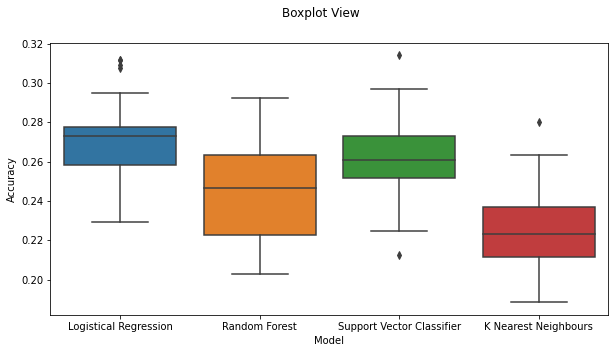

In [115]:
#Boxpot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

<h3><b>Recommendation</b></h3><span style="color:darkblue">We need to train the models on the data which has been treated with pca and then analyze the performance, just as we did with Regression models.</span>

## Classification Models with PCA

### Random Forest Classifier with PCA

In [122]:
#Defining the model
rfc_model = RandomForestClassifier(n_estimators=100,random_state=42).fit(X_train_pca,y_train_pca)
#Predict for test cases
rfc_predictions = rfc_model.predict(X_test_pca)
#Create data frame for actual and predicted values
rfc_eval = pd.DataFrame({'predicted':rfc_predictions, 'actual': y_test_pca})
print(rfc_eval.head())
print()
# Model Evaluation 
mse = np.mean((y_test_pca-rfc_predictions)**2)
accuracy_score_rfc = accuracy_score(y_test_pca, rfc_predictions)*100
print('Accuracy score : ',accuracy_score_rfc)

      predicted  actual
3765         12      12
1278          9       9
568          10      10
149           4       4
1268          9       9

Accuracy score :  91.18357487922705


### Support Vector Classifier with PCA

In [124]:
#Defining the model
svc_model = SVC(kernel="linear",gamma=1,C=1,random_state=42).fit(X_train_pca,y_train_pca)
#Predict for test cases
svc_predictions = svc_model.predict(X_test_pca)
#Create data frame for actual and predicted values
svc_eval = pd.DataFrame({'predicted':svc_predictions, 'actual': y_test_pca})
print(svc_eval.head())
print()
# Model Evaluation 
mse = np.mean((y_test_pca-svc_predictions)**2)
accuracy_score_svc = accuracy_score(y_test_pca, svc_predictions)*100
print('Accuracy score : ',accuracy_score_svc)

      predicted  actual
3765         12      12
1278          9       9
568          10      10
149           4       4
1268          9       9

Accuracy score :  99.8792270531401


### KNN Classifier with PCA

In [126]:
#Defining the model
knnc_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca,y_train_pca)
#Predict for test cases
knnc_predictions = knnc_model.predict(X_test_pca)
#Create data frame for actual and predicted values
knnc_eval = pd.DataFrame({'predicted':knnc_predictions, 'actual': y_test_pca})
print(knnc_eval.head())
print()
# Model Evaluation 
mse = np.mean((y_test_pca-knnc_predictions)**2)
accuracy_score_knnc = accuracy_score(y_test_pca, knnc_predictions)*100
print('Accuracy score : ',accuracy_score_knnc)

      predicted  actual
3765       18.0    18.0
1278       13.5    13.5
568        15.0    15.0
149         6.0     6.0
1268       13.5    13.5

Accuracy score :  99.15458937198068


<h3><b>Model Result Analysis</b></h3><span style="color:darkblue">PCa treated data works well with the classification models as it produces good results. Support Vector Classifier has the highest accuracy at 99%. This is also indicative of overfitting.</span>

## Candidate Algorithm Selection and Analysis
### Analyzing and Comparing Results of Algorithms

In [130]:
print('Results of Regression Models after PCA\n')
print(tabulate([['Linear Regression', rmse_lr, r2_score_lr],
                ['RandomForest Regression', rmse_rf, r2_score_rf],
                ['Gradient Boost Regression', rmse_gbr, r2_score_gbr],
               ], headers=['Model Name', 'RMSE', 'R2 Score']))
print()
print()
print('Results of Classification Models after PCA\n')
print(tabulate([['RandomForest Classifier', accuracy_score_rfc],
                ['Support Vector Classifier', accuracy_score_svc],
                ['KNN Classification', accuracy_score_knnc],
               ], headers=['Model Name', 'Accuracy']))


Results of Regression Models after PCA

Model Name                        RMSE    R2 Score
-------------------------  -----------  ----------
Linear Regression          2.41153e-15    1
RandomForest Regression    0.12769        0.998544
Gradient Boost Regression  0.0137963      0.999983


Results of Classification Models after PCA

Model Name                   Accuracy
-------------------------  ----------
RandomForest Classifier       91.1836
Support Vector Classifier     99.8792
KNN Classification            99.1546


<h3><b>Model Selected: Support Vector Classifier</b></h3><span style="color:darkblue"><b>Since this problem has a better inclination towards a classification approach, Support Vector Classifier is good candidate algorithm to predict age of abalones using the number of rings.</b></span>

<h3><b>Deriving Age from Predicted Rings</b></h3><span style="color:darkblue">The age of an abalone is equal to number of rings+1.5. We use the SVC algorithm to predict Rings and hence fetch the age of the abalone</span>

In [132]:
age_prediction_df = pd.DataFrame()
age_prediction_df['Predicted Age']=svc_eval['predicted']+1.5
age_prediction_df['Actual Age']=svc_eval['actual']+1.5

In [135]:
age_prediction_df.head()

,Predicted Age,Actual Age
3765,13.5,13.5
1278,10.5,10.5
568,11.5,11.5
149,5.5,5.5
1268,10.5,10.5


In [136]:
age_prediction_df.to_csv('Abalone Predicted Age Results.csv')

### Thank You